In [1]:
import anndata
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import igraph
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
import matplotlib.patches as patches
import scanpy as sc
import os
import re
import pickle
from matplotlib_venn import venn2

I'll be following the scvelo vignette for performing RNA velocity analysis BEYOND creating stream plots. Those are all contained in the velocity_analysis.qmd markdown.

I'm performing this analysis for just the objects that contain cancer cells.

In [2]:
sc_obs = ['mm_mets_cancer_cells', 'patient_mets_cancer_cells', 'mm_prim_cancer_cells', 'patient_prim_cancer_cells', 'dogs_prim_cancer_cells', 'dogs_mets_cancer_cells']
sn_obs = ['mm_mets_cancer_cells', 'patient_mets_cancer_cells', 'dogs_mets_cancer_cells', 'patient_prim_cancer_cells']
# os.makedirs("loom_output/split_ad/sc")
# os.makedirs("loom_output/split_ad/sn")
# os.makedirs("figures/scvelo/split_methods/sc")
# os.makedirs("figures/scvelo/split_methods/sn")


# Get Velocity Driving Genes

First, I'm going to get the top 100 genes in terms of "velocity score" within each Ann_Level3.

## Single-Nucleus

In [3]:
sn_velo_genes = dict()
sn_ob_dict = dict()
# get velocity-driving genes
for ob in sn_obs:
    tmp = anndata.read("loom_output/split_ad/sn/" + ob + ".ad")
    sn_ob_dict[ob] = tmp
    scv.tl.rank_velocity_genes(tmp, groupby = "Ann_Level3", min_corr = 0.3)
    rank_genes = tmp.uns["rank_velocity_genes"]
    df = pd.DataFrame(tmp.uns["rank_velocity_genes"]["names"])
    sn_velo_genes[ob] = df


ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:24) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:04) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


## Single Cell

In [4]:
sc_velo_genes = dict()
sc_ob_dict = dict()
# get velocity-driving genes
for ob in sc_obs:
    tmp = anndata.read("loom_output/split_ad/sc/" + ob + ".ad")
    sc_ob_dict[ob] = tmp
    scv.tl.rank_velocity_genes(tmp, groupby = "Ann_Level3", min_corr = 0.3, n_genes = 100)
    rank_genes = tmp.uns["rank_velocity_genes"]
    df = pd.DataFrame(tmp.uns["rank_velocity_genes"]["names"])
    sc_velo_genes[ob] = df

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:04) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:13) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:17) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:09) --> added 
   

# Compare Velocity Driving Genes

Now I'm going to investigate what genes are driving the velocity results.

## Shared Genes Across Methods and Tumor type

Since we have both single-cell and single-nuclei data, and since scvelo was built around single-cell data, I'm going to assess how consistent the results are across methods. I expect to see a significant amount of differences between the two. If this is the case, I'm going to ditch the single-nuclei data and only analyze the single-cell data.

### Tumor Apoptosis

KeyError: 'Tumor_Apoptosis'

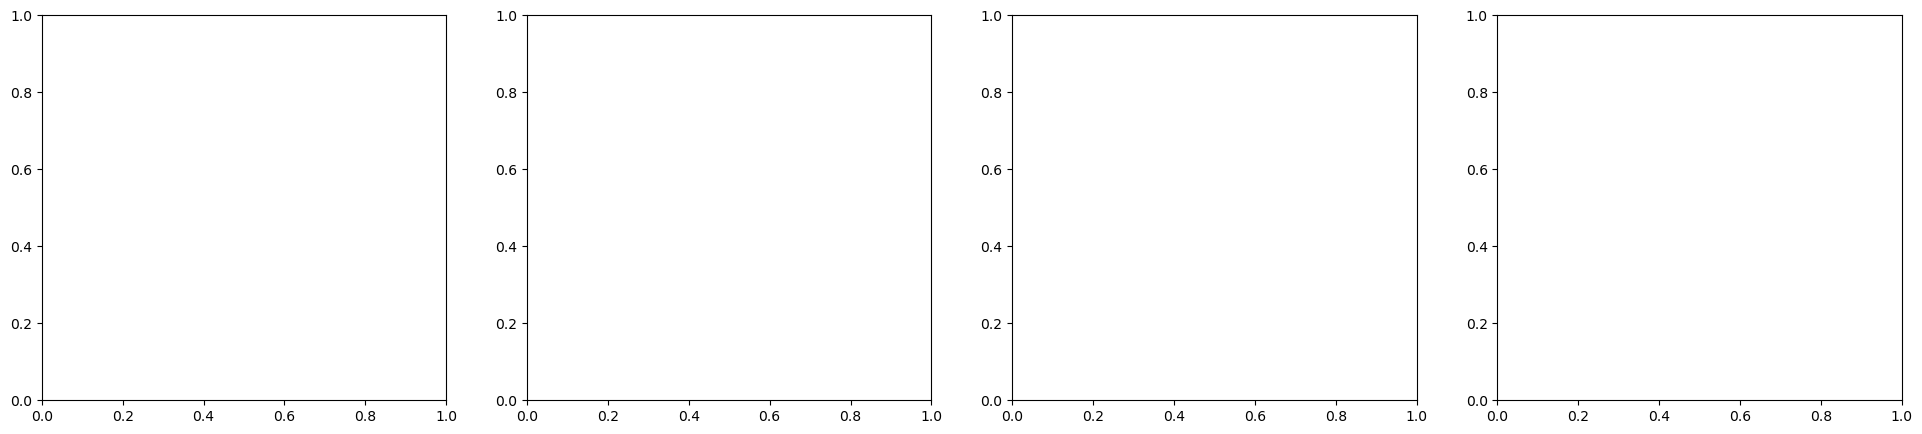

In [8]:
sc_obs = list(sc_velo_genes.keys())
sn_obs = list(sn_velo_genes.keys())

like_keys = set(sc_obs) & set(sn_obs)
like_keys

num_venns = len(like_keys)
# #set subplot layout
# cols = 3
# rows = 1
# fig, axes = plt.subplots(rows, cols, figsize = (cols * 6, rows * 5))

def velo_venn(cell_type):
    #set subplot layout
    cols = 4
    rows = 1
    fig, axes = plt.subplots(rows, cols, figsize = (cols * 6, rows * 5))
    for i, ob in enumerate(like_keys):
        # just get genes from tumor apoptosis; they're all the same across the tumor types
        sn_genes = sn_velo_genes[ob][cell_type]
        sc_genes = sc_velo_genes[ob][cell_type]
        ax = axes[i]
        venn2([set(sn_genes), set(sc_genes)], set_labels = ("Single Nuclei", "Single Cell"), ax = ax)
        ax.set_title(f"Velocity-Driving Genes in {ob}")
    plt.tight_layout()
    plt.show()

velo_venn("Tumor_Apoptosis")


KeyError: 'Tumor_Apoptosis'

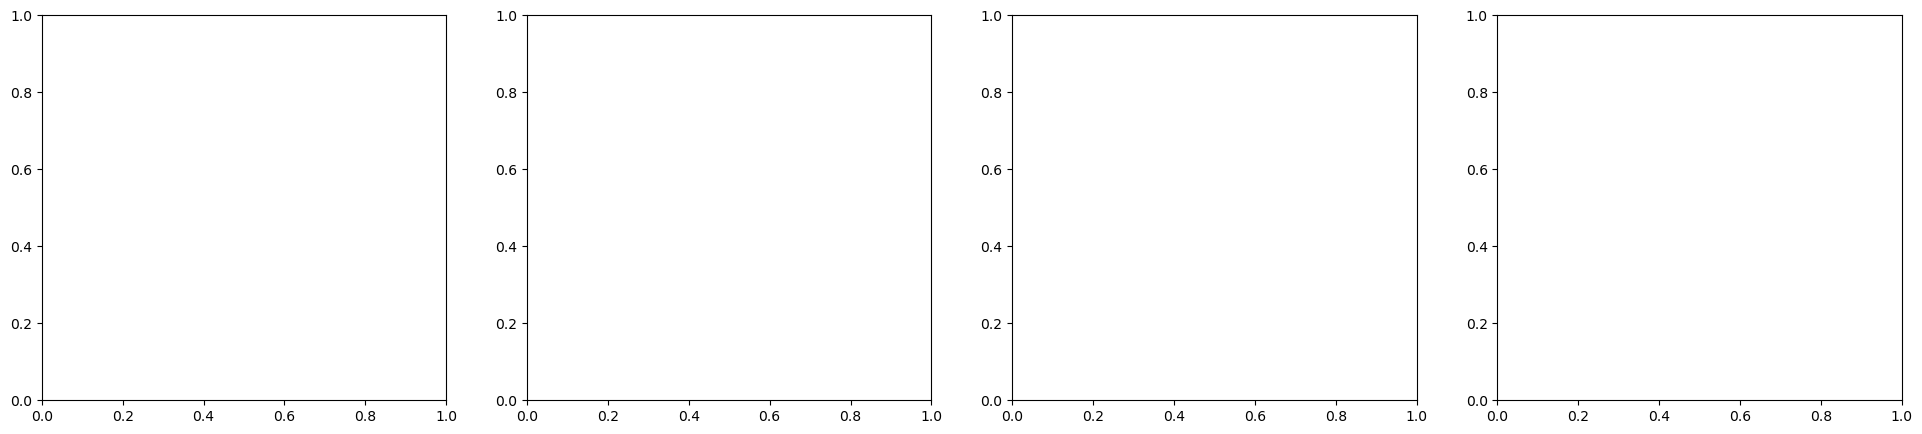

In [14]:
velo_venn("Tumor_Apoptosis")

### Tumor Fibrogenic

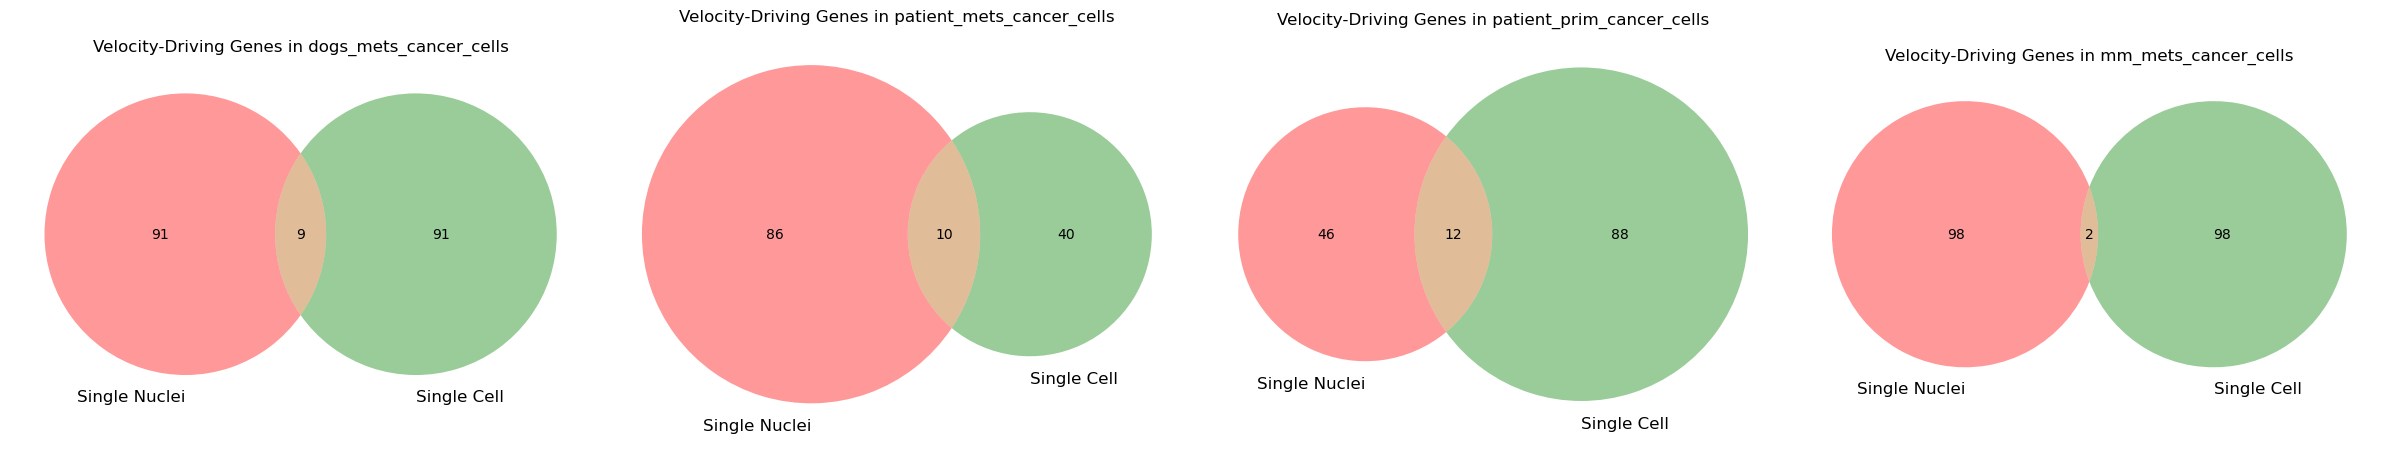

In [9]:
velo_venn("Tumor_Fibrogenic")
# like_keys

### Tumor Interactive

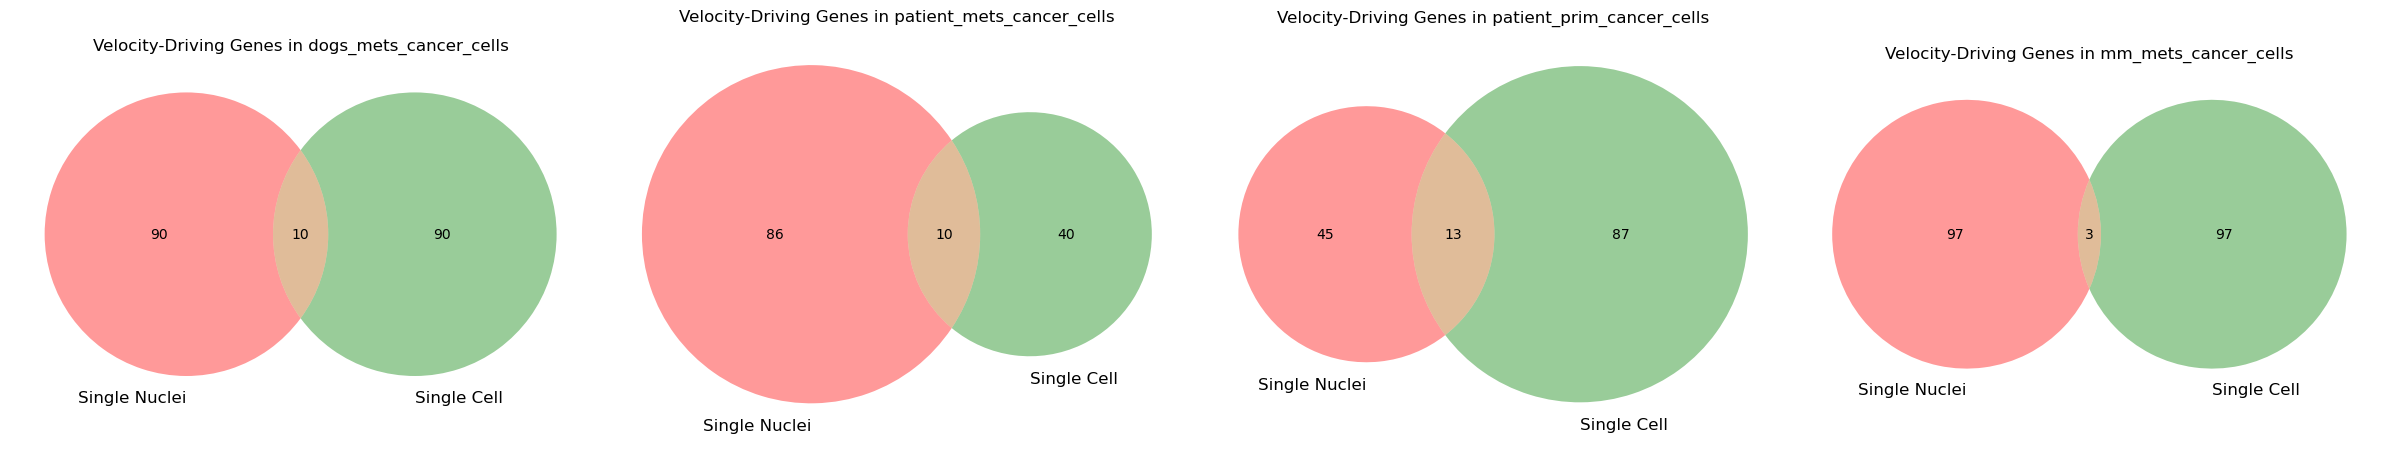

In [10]:
velo_venn("Tumor_Interactive")

### Tumor Progenitor

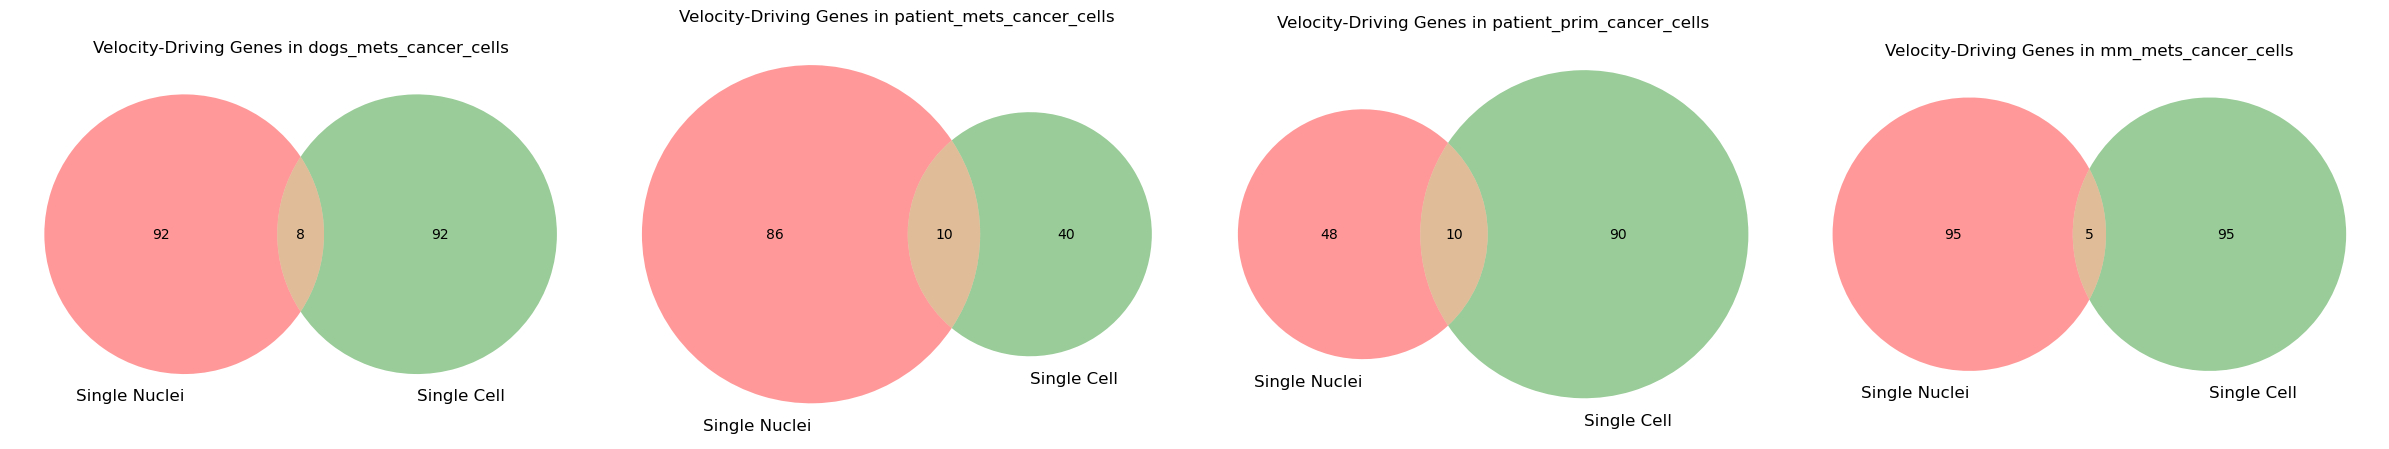

In [11]:
velo_venn("Tumor_Progenitor")

### Tumor Proliferative

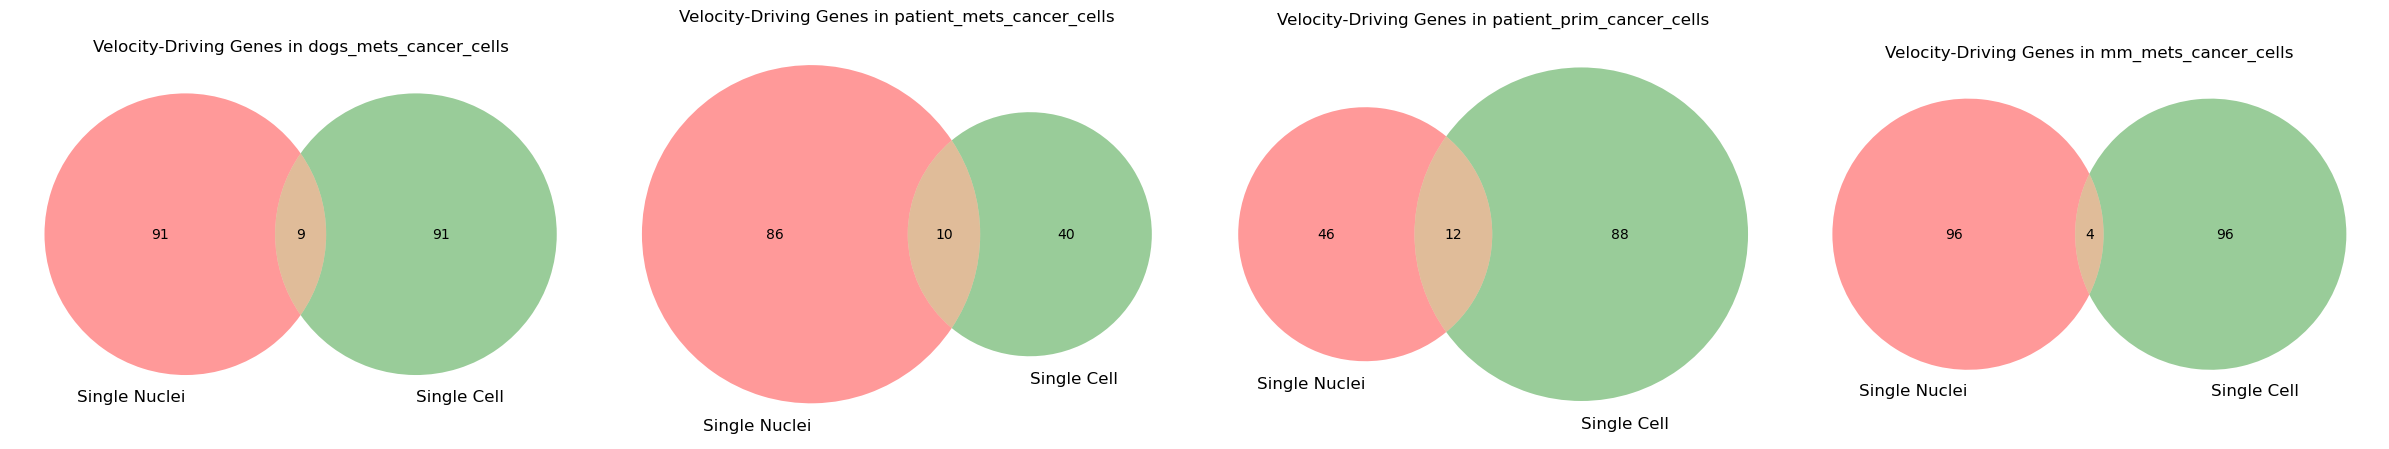

In [12]:
velo_venn("Tumor_Proliferative")

### Tumor Synthetic

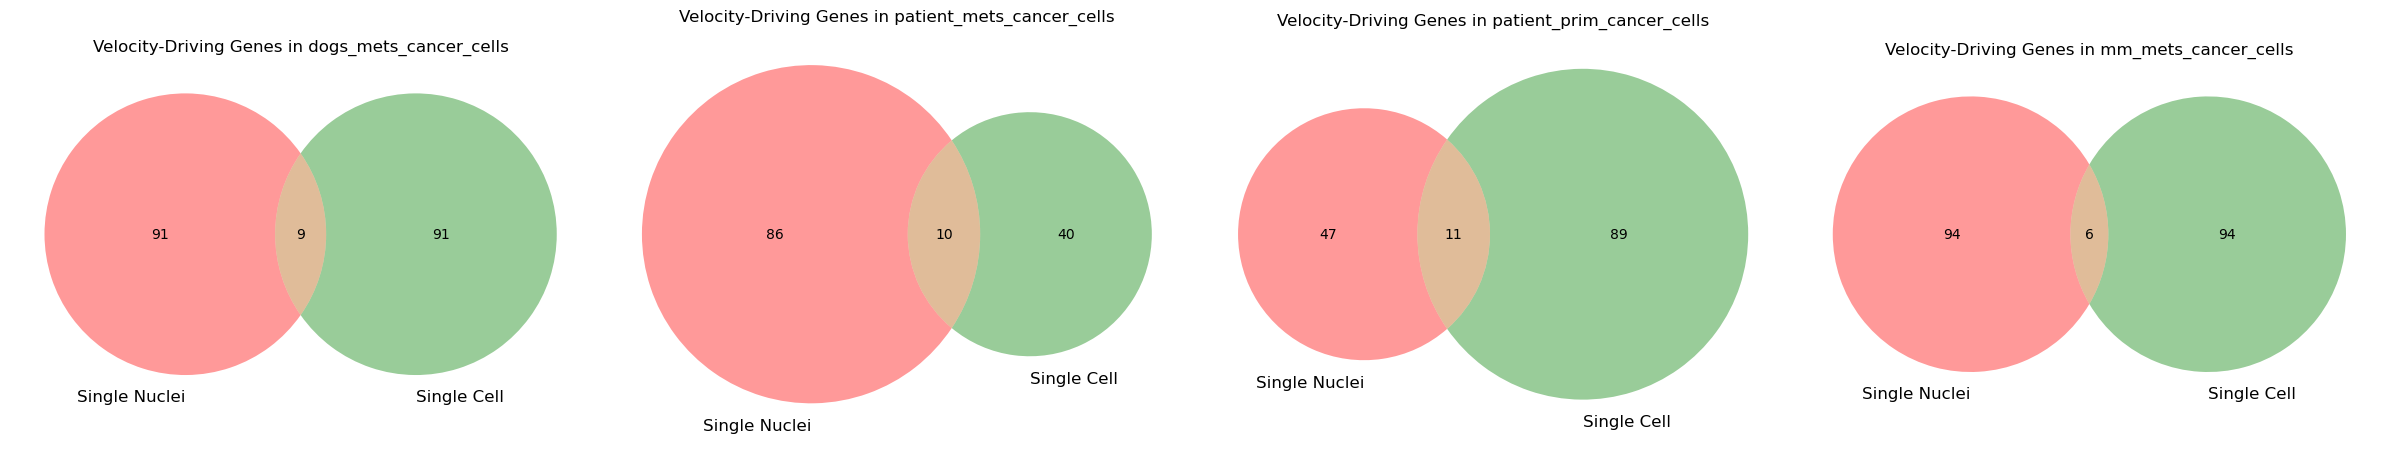

In [13]:
velo_venn("Tumor_Synthetic")

It doesn't seem like there's many shared RNA velocity driver genes between the two technologies. I'm not at all surprised by this.

In [26]:
tmp_sn = sn_velo_genes["patient_prim_cancer_cells"]
tmp_sc = sc_velo_genes["patient_prim_cancer_cells"]

tmp_sn

Tumor_Apoptosis Tumor_Fibrogenic Tumor_Interactive Tumor_Progenitor  \
0            MECOM            PAPPA              PRKY           RNF19A   
1          ADAMTS6            CALD1             CALD1         C9orf135   
2           ANKRD1              FAP            ITGA11            GLRA3   
3            TNNT3             PRKY             SYNE1              LUM   
4           RNF19A           COL3A1             MECOM          ADAMTS6   
5            GLRA3            SULF1             SULF1             MYH2   
6           MYBPC1              TNC             PAPPA            GREM1   
7           ATP1A2            LMCD1               FAP         SERPINE2   
8         C9orf135            MXRA5            COL6A2           ATP1A2   
9             MYH1           NFKBIZ             MUC15             TRDN   
10         COL27A1           COL6A2             USP9Y            IGFN1   
11             FN1           ITGA11             HMCN1            CMYA5   
12           SYNE1            MECOM       NECTIN3-AS1            HMCN1   
13            IBSP            USP9Y               MYC            MECOM   
14      MIR133A1HG          COL16A1              MYH1           COL6A3   
15             FAP            MUC15             TNNT3           ITGA10   
16             AHR             LIPH            MYBPC1          COL27A1   
17            EMP1           COL6A1             GLRA3             CCN1   
18          ITGA11          ADAMTS6               AHR              FN1   
19             LUM            HMCN1             IFI44             XAF1   
20            TRDN              FN1             LMCD1              NEB   
21           TGFBI            POSTN              NRAP       MIR133A1HG   
22           POSTN      NECTIN3-AS1              TRDN              AHR   
23            CCN1       MIR133A1HG            COL6A1           ANKRD1   
24            LIPH              MYC           ADAMTS6      NECTIN3-AS1   
25           MUC15             EMP1               TNC            SYNE1   
26             NEB          COL27A1               NEB            IFI44   
27           IGFN1             MYH1             CMYA5             NRAP   
28          COL6A3            SYNE1              LIPH           MYBPC1   
29           HMCN1           MYBPC1             POSTN            POSTN   
30          COL6A1            TNNT3             IGFN1            MUC15   
31          ITGA10              NEB               FN1             MYH1   
32            MYH2            IFI44            ANKRD1           NFKBIZ   
33           CMYA5              AHR            COL6A3             EMP1   
34        SERPINE2           PDLIM3           COL27A1             LIPH   
35            XAF1           ITGA10              RYR1           PDLIM3   
36          MYBPC2            GLRA3            ATP1A2           COL6A2   
37           LMCD1           FBXO32           COL16A1              TNC   
38            RYR1             IBSP            MYBPC2           ITGA11   
39          NFKBIZ            GREM1            ITGA10           COL6A1   
40           CALD1            IGFN1             GREM1            MXRA5   
41             TNC             RYR1            NFKBIZ            TNNT3   
42            XIST             XAF1              XAF1          COL16A1   
43     NECTIN3-AS1         SERPINE2              EMP1             XIST   
44           PAPPA           MYBPC2        MIR133A1HG           COL3A1   
45            PRKY           COL6A3            PDLIM3             PRKY   
46          FBXO32           ANKRD1             TGFBI            USP9Y   
47          COL3A1              LUM               LUM              FAP   
48         COL16A1           RNF19A            FBXO32            SULF1   
49           MXRA5            TGFBI             MXRA5             IBSP   
50          COL6A2             TRDN              MYH2           MYBPC2   
51           USP9Y            CMYA5              XIST             RYR1   
52           GREM1           ATP1A2              IBSP            PAPPA   
53     

## Examine Velocity In Shared Genes

For a subset of the genes that are shared between the two sequencing methods, I'm going to look at the velocity values for each technology in the same umap space.

I'll look at this in patient primary cancer cells, as these samples shared the most velocity-driving genes across all cell types.

In [23]:
sc_patient_prim = sc_ob_dict["patient_prim_cancer_cells"]
sn_patient_prim = sn_ob_dict["patient_prim_cancer_cells"]

# get shared top velocity genes
sc_pp_genes = set(sc_velo_genes["patient_prim_cancer_cells"].values.flatten().tolist())
sn_pp_genes = set(sn_velo_genes["patient_prim_cancer_cells"].values.flatten().tolist())

shared_pp_genes = list(sc_pp_genes & sn_pp_genes)

# also get top genes for each cell type in each technology
top_sc = sc_velo_genes["patient_prim_cancer_cells"].iloc[0, ]
top_sn = sn_velo_genes["patient_prim_cancer_cells"].iloc[0, ]
shared_pp_genes

['POSTN',
 'ADAMTS6',
 'PAPPA',
 'SERPINE2',
 'TNC',
 'IBSP',
 'COL27A1',
 'COL6A1',
 'COL6A3',
 'COL6A2',
 'FN1',
 'MXRA5',
 'COL16A1']

We have 13 genes across all tumor subtyes that have cluster-specific differential velocity expression in both the single-cell and single-nuclei patient primary data.


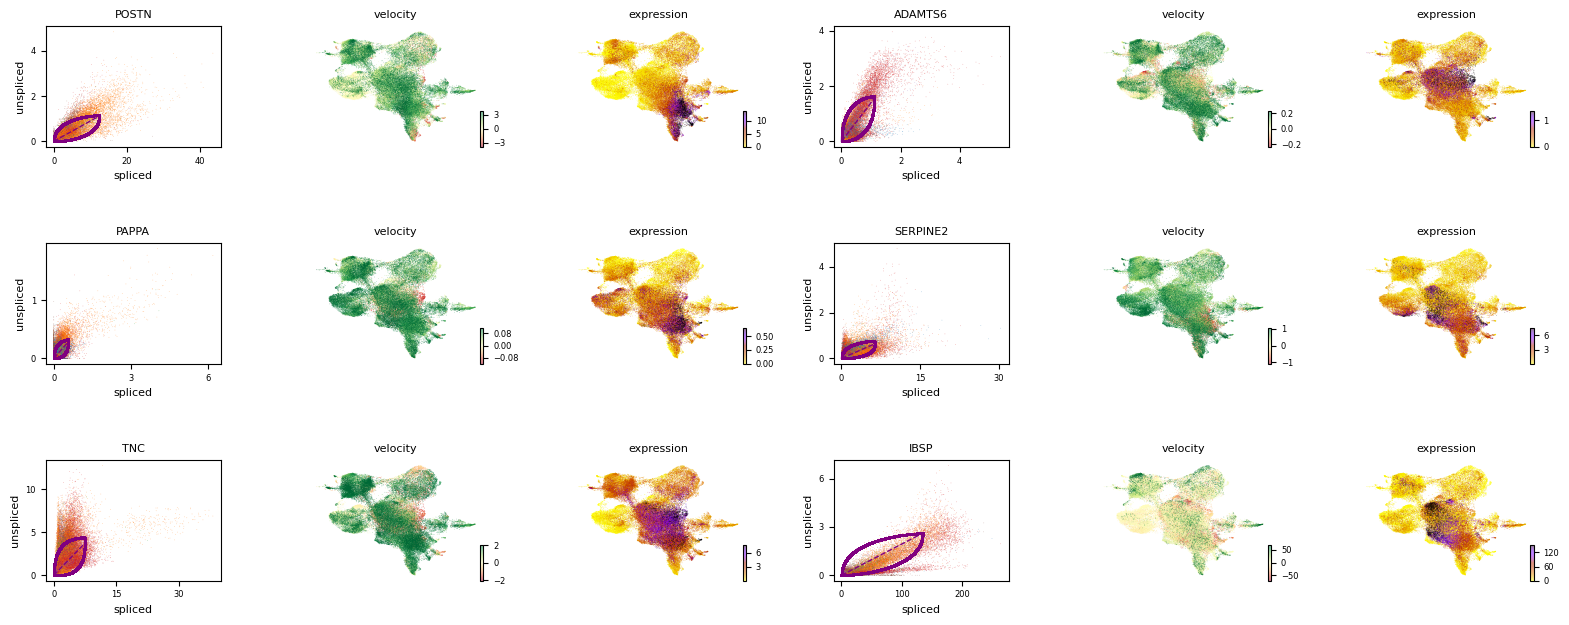

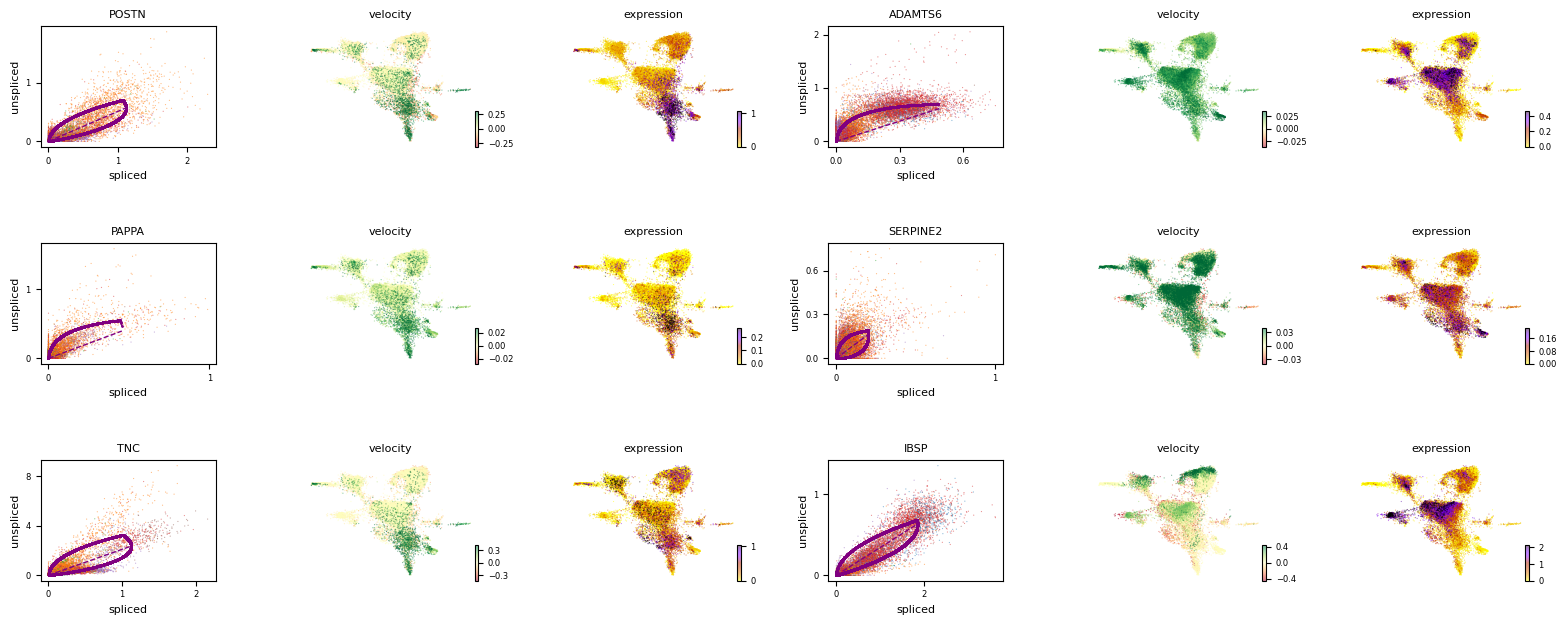

In [49]:
marker_genes = ["BNIP3", "EGLN3", "PDK1"]

scv.pl.velocity(sc_patient_prim, shared_pp_genes[:6], color = "Ann_Level3", ncols = 2)
scv.pl.velocity(sn_patient_prim, shared_pp_genes[:6], color = "Ann_Level3", ncols = 2)

Even in just these 5 genes, it is always the case that the velocity scores are greater in the single-cell data by a factor of ~10. Thus, including the single-nuclei data in the velocity analysis will likely induce noise.

# Compare Confidence and Magnitude of Velocity Across Data types

We can get estimates of the speed of the velocity -- the length of the velocity vectors -- and the coherence of the velocity -- how much do the velocity vectors "agree" with each other within a certain cell type.

In [ ]:
# first we'll add velocity length and confidence to our anndata objects
for ob in sc_obs:
    scv.tl.velocity_confidence(sc_ob_dict[ob])

for ob in sn_obs:
    scv.tl.velocity_confidence(sn_ob_dict[ob])




    # df = tmp.obs.groupby("Ann_Level3")[keys].mean().T
    # df.style.background_gradient(cmap = "coolwarm", axis = 1)


## Patient Primary

In [ ]:
# Function for making colored tables of velocity magnitude and confidence
def velo_len_conf_table(ob):
    keys = ["velocity_length", "velocity_confidence"]
    sc_df = sc_ob_dict[ob].obs.groupby("Ann_Level3")[keys].mean().T. \
        rename(index = {"velocity_length": "sc_velo_length", "velocity_confidence": "sc_velo_confidence"})
    sn_df = sn_ob_dict[ob].obs.groupby("Ann_Level3")[keys].mean().T. \
        rename(index = {"velocity_length": "sn_velo_length", "velocity_confidence": "sn_velo_confidence"})
    sn_df.reindex(index = ["sn_velo_length", "sn_velo_confidence"])
    comb_df = pd.concat([sc_df, sn_df])
    styled_out = comb_df.style.background_gradient(subset=pd.IndexSlice[["sc_velo_length", "sn_velo_length"], :], axis=None, cmap = "coolwarm") \
        .background_gradient(subset=pd.IndexSlice[["sc_velo_confidence", "sn_velo_confidence"], :], axis=None, cmap = "coolwarm")
    display(styled_out)
    # # return(comb_df)

velo_len_conf_table("patient_prim_cancer_cells")

## Patient Mets

In [ ]:
velo_len_conf_table("patient_mets_cancer_cells")

## Mouse Mets

In [ ]:
velo_len_conf_table("mm_mets_cancer_cells")

## Dog Mets

In [ ]:
velo_len_conf_table("dogs_mets_cancer_cells")

# Stream Plots for Different Methods

I'm curious whether or not the directionality of the velocity changes significantly across methods within each of the different methods.

In [53]:
color_mapping = {"Tumor_Synthetic": "#D43F3A",
                 "Tumor_Fibrogenic": "#EEA236",
                 "Tumor_Progenitor": "#357EBD",
                 "Tumor_Proliferative": "#5CB85C",
                 "Tumor_Interactive": "#B8B8B8",
                 "Tumor_Apoptosis": "#9632B8"}



# function to produce stream embedding plots for each model and each method
def umap_panel(ob):
    # get sc ob and sn ob
    sc_ob = sc_ob_dict[ob]
    sn_ob = sn_ob_dict[ob]
    # set figure parameters
    fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))
    # column and row titles
    row_titles = ["UMAP", "FDL"]
    col_titles = ["Single-Cell", "Single-Nuclei"]    
    for i, red in enumerate(["umap", "fdl"]):
        # get x and y bound for umap coordinates
        x_red = list(sc_ob.obsm["X_" + red][:, 0]) + list(sn_ob.obsm["X_" + red][:, 0])
        min_x = min(x_red)
        max_x = max(x_red)
        y_red = list(sc_ob.obsm["X_" + red][:, 1]) + list(sn_ob.obsm["X_" + red][:, 1])
        min_y = min(y_red)
        max_y = max(y_red)
        for j, method in enumerate([sc_ob, sn_ob]):
            ax = axes[i, j]
            scv.pl.velocity_embedding_stream(method,
                                             basis = red,
                                             ax = ax,
                                             color = "Ann_Level3",
                                             palette = color_mapping,
                                             show = False,
                                             xlim = [min_x - 0.25, max_x + 0.25],
                                             ylim = [min_y - 0.25, max_y + 0.25])
            # add titles; only do so if it's the first row
            if i == 0:
                ax.set_title(col_titles[j], fontsize=20, pad=10)
            # Add a rectangle border around each subplot
            rect = patches.Rectangle(
                (0, 0), 1, 1, transform=ax.transAxes,
                linewidth=2, edgecolor='black', facecolor='none', zorder=10
            )
            ax.add_patch(rect)
    for i, title in enumerate(row_titles):
        # y-coordinate = 0.5 of row, x = a bit left of the figure
        fig.text(0.04, 0.74 - i * 0.48, title, va='center', ha='center', rotation='vertical', fontsize=20)

    plt.tight_layout(rect=[0.08, 0, 1, 1])  # Leave space for row labels
    plt.show()
    
    plt.tight_layout()
    plt.show()





## Patient Primary

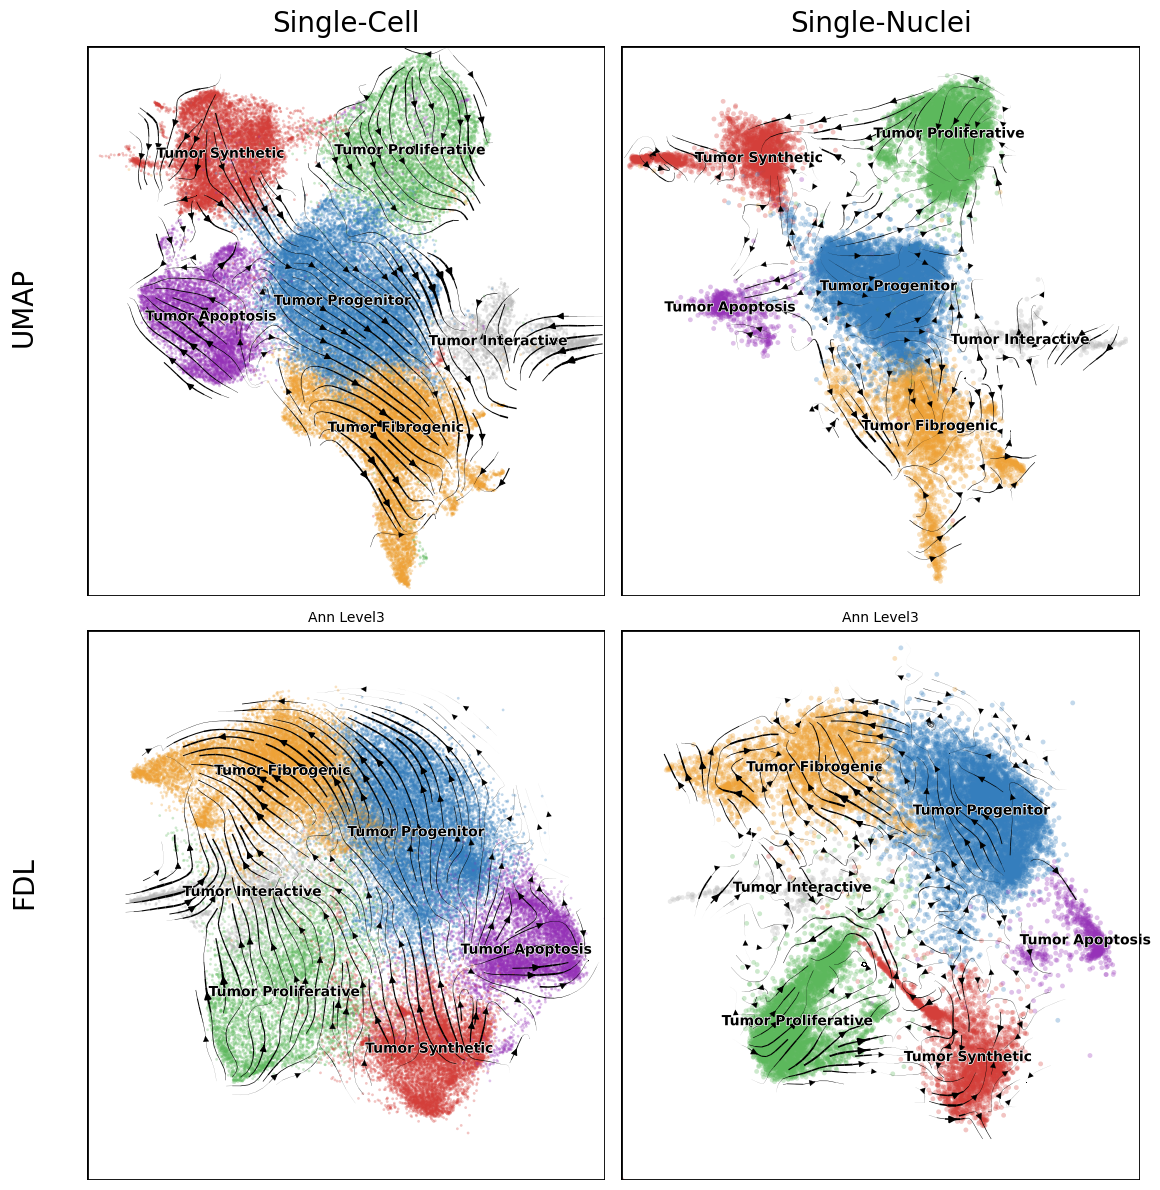

<Figure size 640x480 with 0 Axes>

In [ ]:
umap_panel("patient_prim_cancer_cells")

## Patient Mets

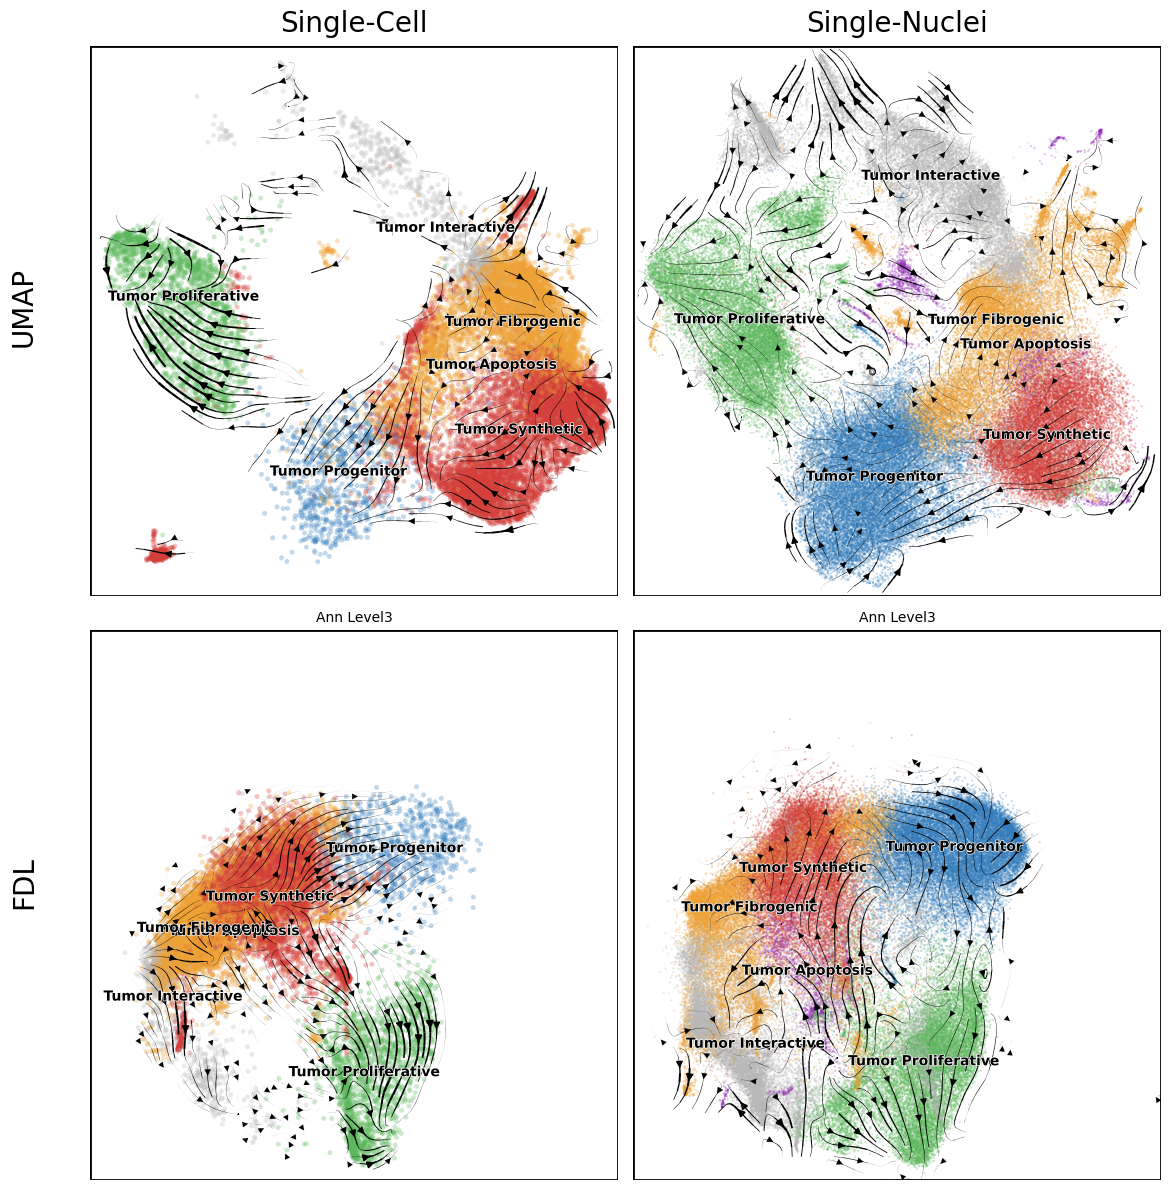

<Figure size 640x480 with 0 Axes>

In [ ]:
umap_panel("patient_mets_cancer_cells")

## Mouse Mets

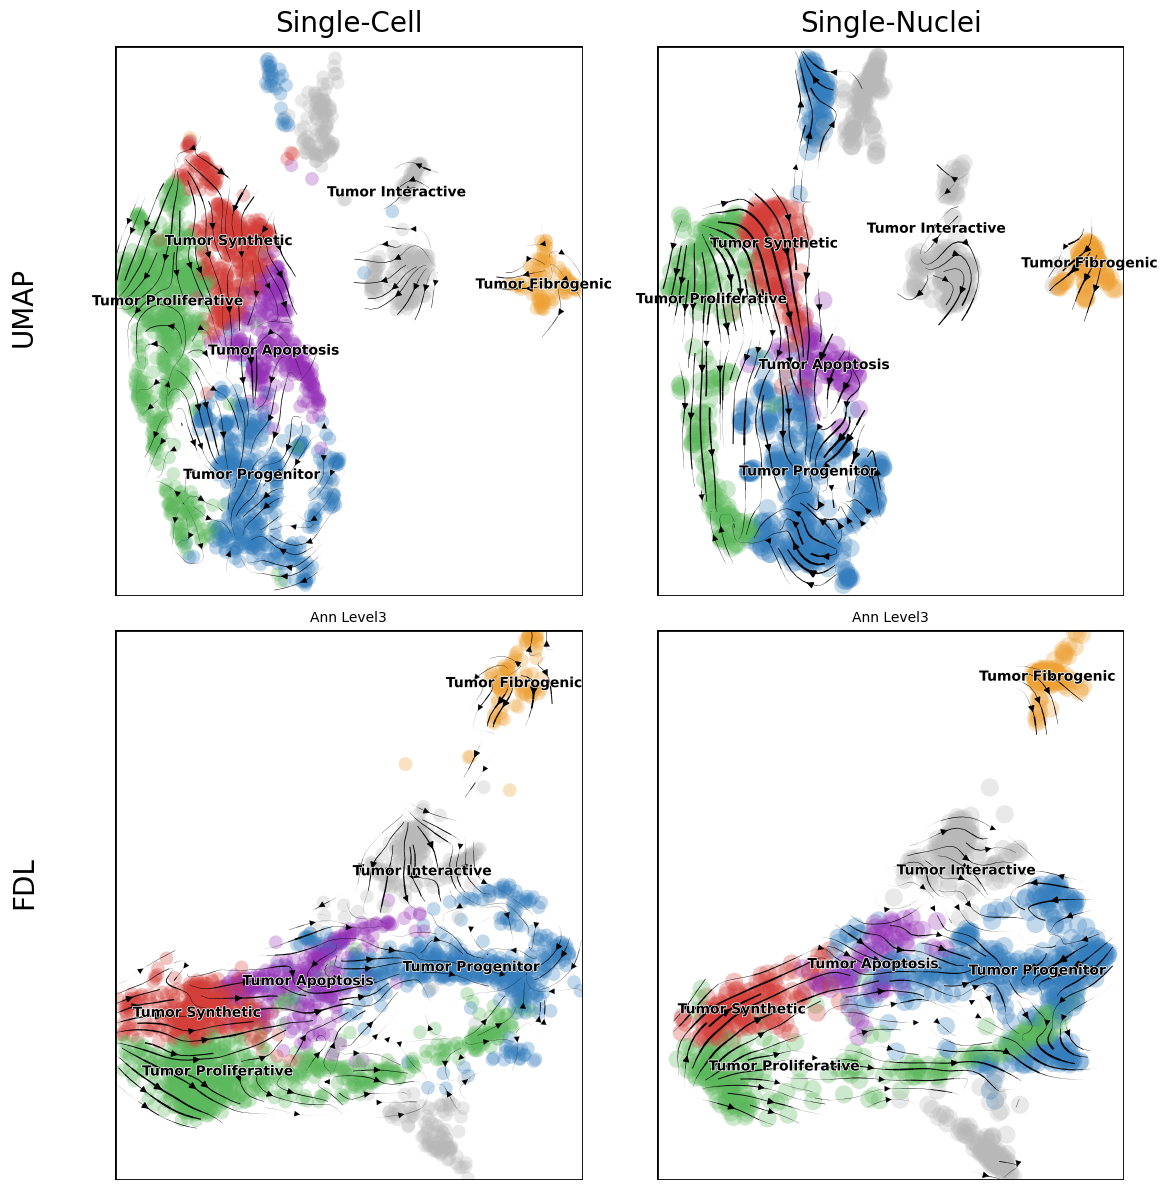

<Figure size 640x480 with 0 Axes>

In [ ]:
umap_panel("mm_mets_cancer_cells")

## Dog Mets

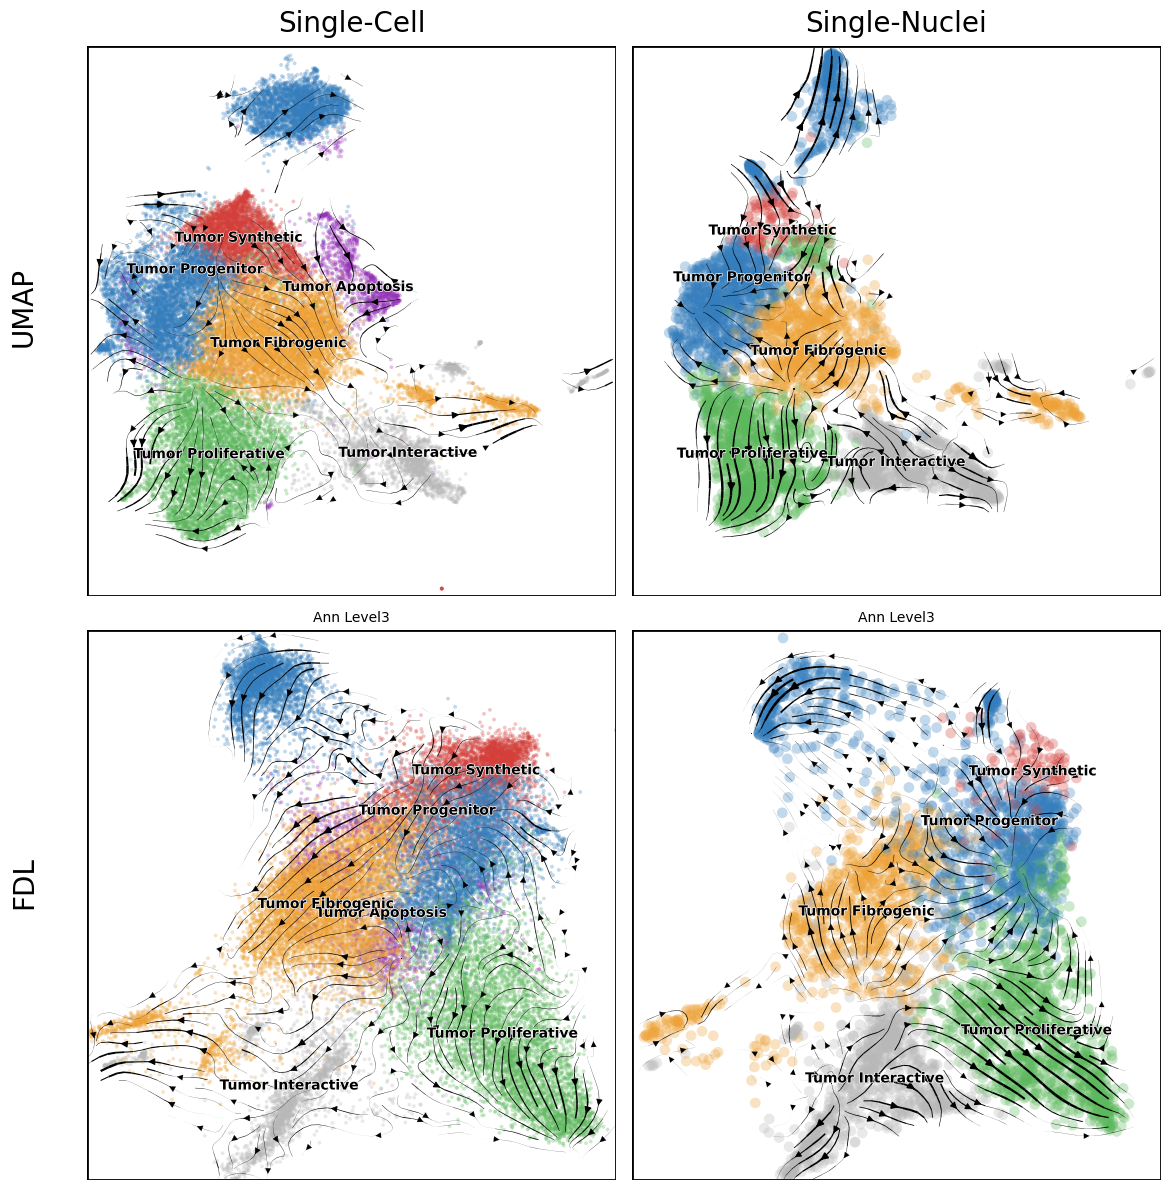

<Figure size 640x480 with 0 Axes>

In [ ]:
umap_panel("dogs_mets_cancer_cells")

# Infer Trajectory with PAGA

We can infer cell trajectory from the RNA velocity using PAGA. PAGA aims to create a graph-like map based on connectivity of the manifold partitions (clusters) in single cell data that can also preserve the global topology of the data, which is lost with the standard clustering steps. This can be combined with RNA velocity information to make a more robust prediction of cell trajectory.

In [57]:
sc_keys = list(sc_ob_dict.keys())
keys = "velocity_length", "velocity_confidence"
for ob in sc_keys:
    tmp = sc_ob_dict[ob]
    scv.tl.velocity_confidence(tmp)
    tmp.uns['neighbors']['distances'] = tmp.obsp['distances']
    tmp.uns['neighbors']['connectivities'] = tmp.obsp['connectivities']
    scv.tl.paga(tmp, groups='Ann_Level3')
    sc_ob_dict[ob] = tmp


sn_keys = list(sn_ob_dict.keys())
for ob in sn_keys:
    tmp = sn_ob_dict[ob]
    scv.tl.velocity_confidence(tmp)
    tmp.uns['neighbors']['distances'] = tmp.obsp['distances']
    tmp.uns['neighbors']['connectivities'] = tmp.obsp['connectivities']
    scv.tl.paga(tmp, groups='Ann_Level3')
    sn_ob_dict[ob] = tmp

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
computing terminal states
    identified 4 regions of root cells and 2 regions of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusio

In [55]:
def joint_paga(ob, alpha = 0.01):
    sc_ob = sc_ob_dict[ob]
    sn_ob = sn_ob_dict[ob]
    # using fdl bc i think it makes more sense if you're trying to show trajectory
    scv.pl.paga(sc_ob,
                basis = "fdl",
                alpha = alpha,
                size = 50,
                min_edge_width = 2,
                node_size_scale = 1.5,
                node_size_power = 0,
                palette = color_mapping,
                title = "Trajectory in Single-Cell Data")
    scv.pl.paga(sn_ob,
                basis = "fdl",
                alpha = alpha,
                size = 50,
                min_edge_width = 2,
                node_size_scale = 1.5,
                node_size_power = 0,
                palette = color_mapping,
                title = "Trajectory in Single-Nuclei Data")
    plt.tight_layout()
    plt.show()

## Comparing Single-Cell to Single-Nuclei

Our last assessment of the differences between the single-cell and single-nuclei derived velocity information will be comparing the inferred cell trajectories in each.

### Patient Primary

In [56]:
joint_paga("patient_prim_cancer_cells")

KeyError: 'paga'

### Patient Mets

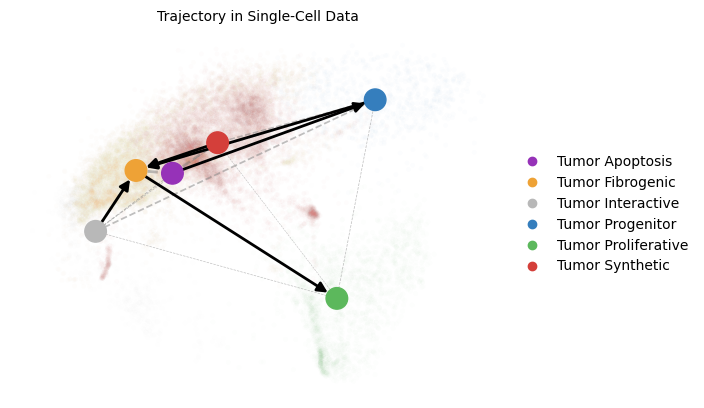

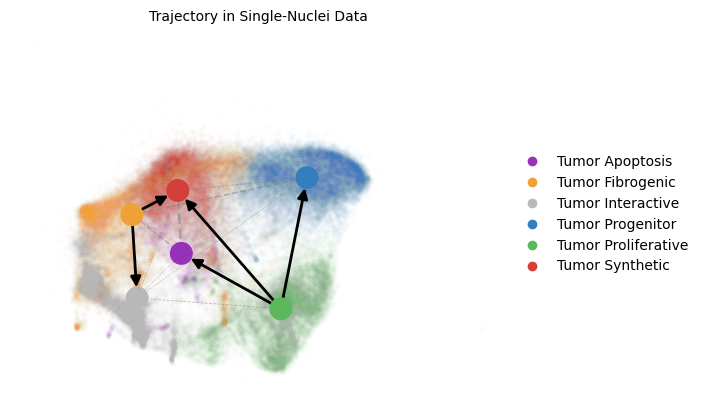

<Figure size 640x480 with 0 Axes>

In [ ]:
joint_paga("patient_mets_cancer_cells")

### Mouse Mets

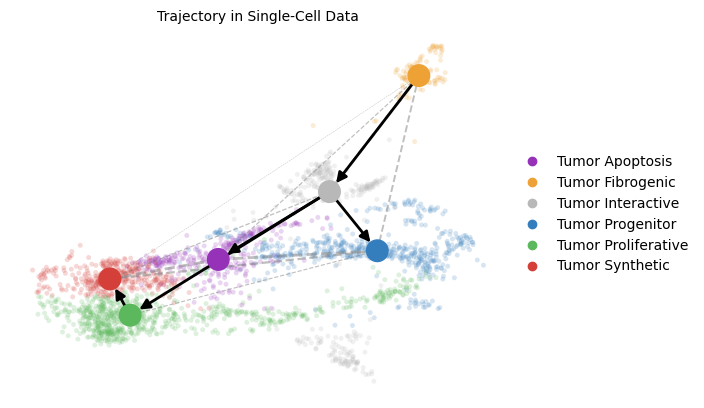

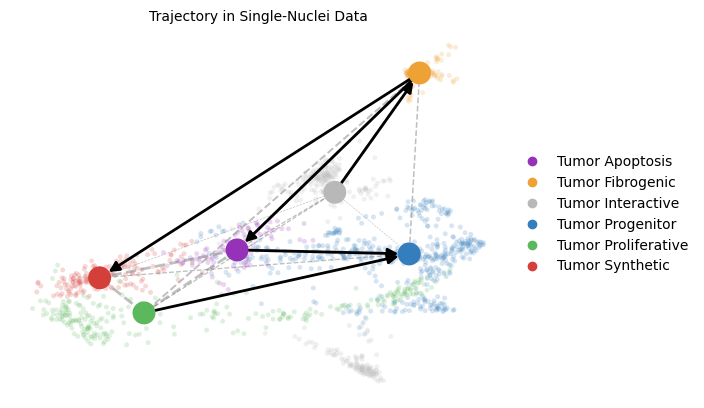

<Figure size 640x480 with 0 Axes>

In [ ]:
joint_paga("mm_mets_cancer_cells", alpha = 0.2)

### Dog Mets

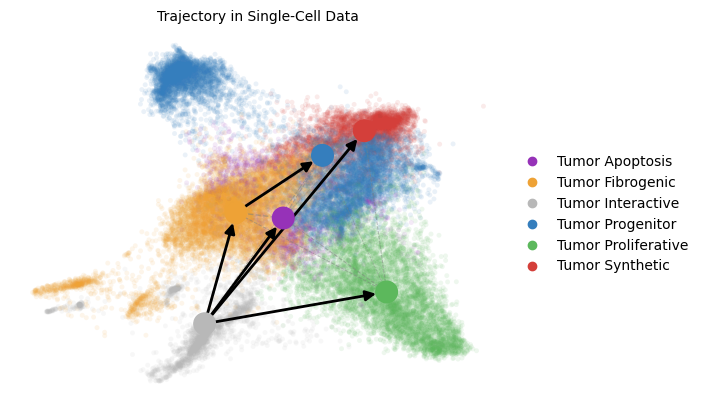

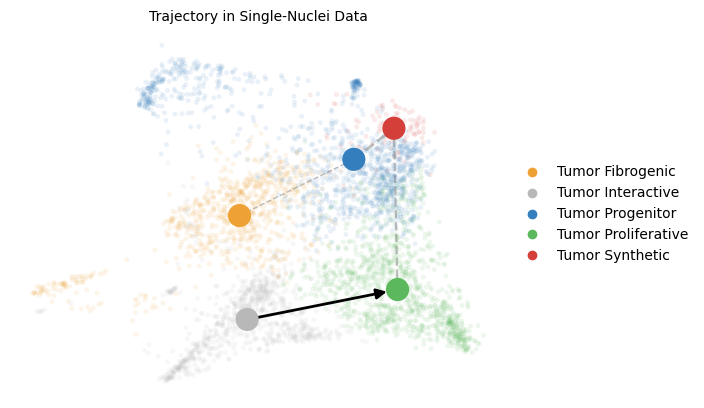

<Figure size 640x480 with 0 Axes>

In [ ]:
joint_paga("dogs_mets_cancer_cells", alpha = 0.1)

## Compare Trajectory Across Models

Now that we see there are strong discrepancies between the single-nuclei- and single-cell-derived RNA velocity data, I'm going to proceed with analysis of just the single-cell data. Using the PAGA results, I'm going to compare the inferred trajectories across our models to look for any consistent patterns

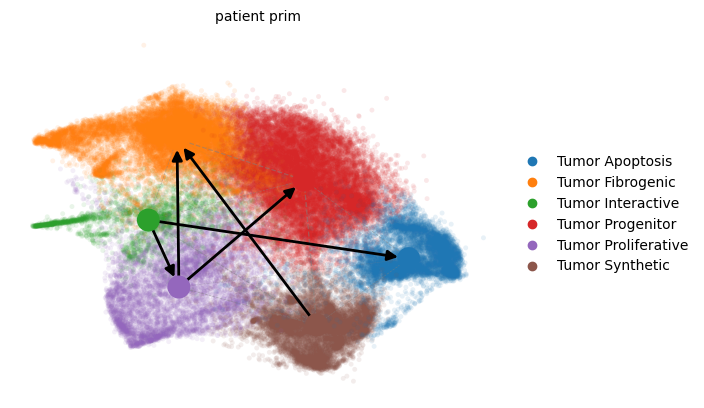

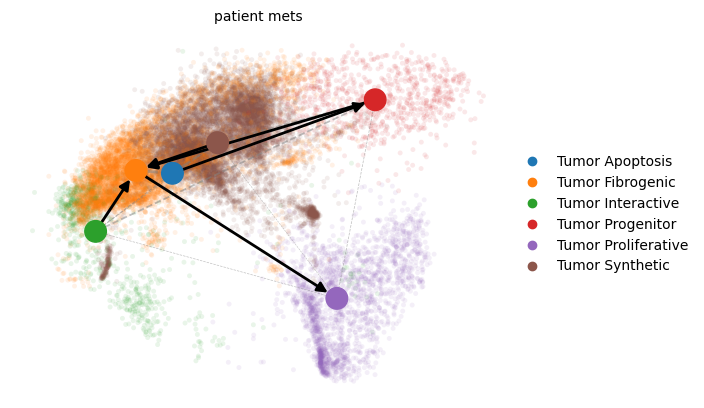

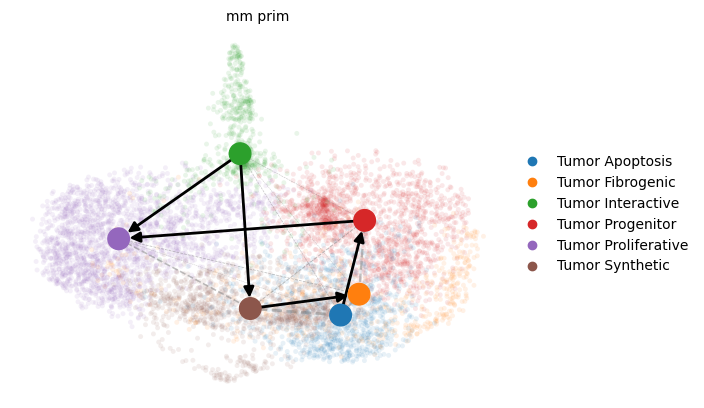

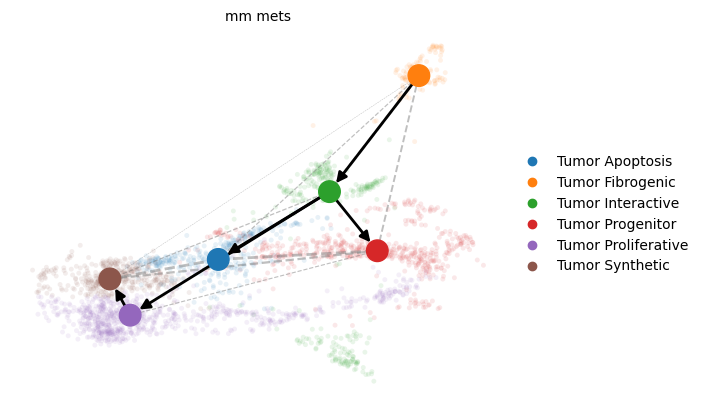

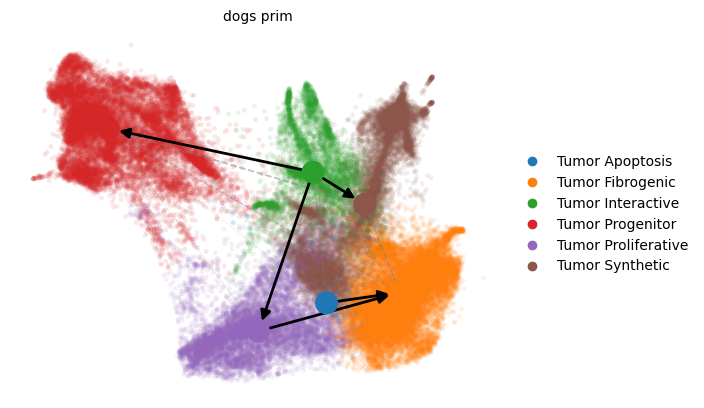

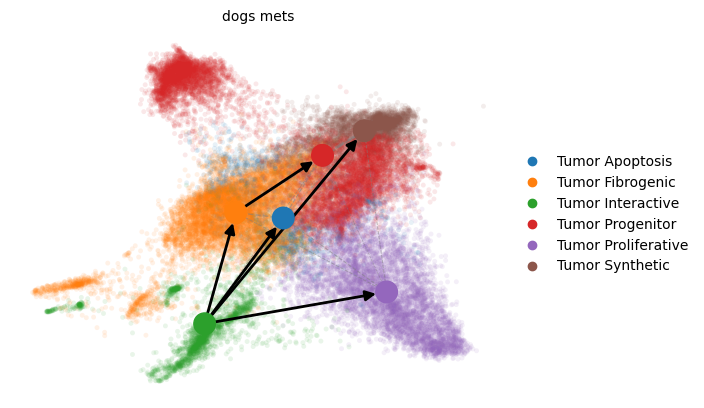

In [ ]:
for i, model in enumerate(["patient", "mm", "dogs"]):
    for j, stage in enumerate(["prim", "mets"]):
        ob = sc_ob_dict[model + "_" + stage + "_cancer_cells"]
        scv.pl.paga(ob,
                    basis = "fdl",
                    size = 50,
                    alpha = .1,
                    min_edge_width = 2,
                    node_size_scale = 1.5,
                    node_size_power = 0,
                    title = model + "_" + stage)


In [ ]:
# tmp = sc_ob_dict["dogs_mets_cancer_cells"]
# cols = ["Tumor_Apoptosis",
#         "Tumor_Fibrogenic",
#         "Tumor_Interactive",
#         "Tumor_Progenitor",
#         "Tumor_Proliferative",
#         "Tumor_Synthetic"]

# df = scv.get_df(tmp, 'paga/transitions_confidence', precision = 2, columns= cols, index = cols).T
# df.style.background_gradient(cmap = "Blues").format("{:.2g}").set_caption("Dog Mets")

for ob in sc_keys:
    df = scv.get_df(sc_ob_dict[ob],
                    "paga/transitions_confidence",
                    precision = 2,
                    columns = cols,
                    index = cols).T
    df = df.style.background_gradient(cmap = "Blues").format("{:.2g}").set_caption(ob)
    display(df)

In [ ]:
df_list = []
for ob in sc_keys:
    df = scv.get_df(sc_ob_dict[ob],
                    "paga/transitions_confidence",
                    precision = 2,
                    columns = cols,
                    index = cols).T
    df = df > 0
    df_list.append(df.replace({True: 1, False: 0}))


# df_list[0] + df_list[1] + df_list[2]
sum(df_list).style.background_gradient(cmap = "Blues").format("{:.2g}")

# Velocity Activity of Each Subpopulations Marker Genes

In [248]:
tumor_features = dict(
    Tumor_Apoptosis = ["BNIP3", "EGLN3", "PDK1"],
    Tumor_Fibrogenic = ["COL6A3", "COL3A1", "PDGFRB", "COL6A1", "POSTN"],
    Tumor_Interactive = ["CTSB", "CSF1R", "PTPRC", "PTPRJ"],
    Tumor_Progenitor = ["ROBO2", "CD36", "SATB2"],
    Tumor_Proliferative = ["CENPF", "ASPM", "BIRC5", "AURKB"],
    Tumor_Synthetic = ["RPL37A", "RPS18", "RPL39", "RPL35"]
)

tumor_features

{'Tumor_Apoptosis': ['BNIP3', 'EGLN3', 'PDK1'],
 'Tumor_Fibrogenic': ['COL6A3', 'COL3A1', 'PDGFRB', 'COL6A1', 'POSTN'],
 'Tumor_Interactive': ['CTSB', 'CSF1R', 'PTPRC', 'PTPRJ'],
 'Tumor_Progenitor': ['ROBO2', 'CD36', 'SATB2'],
 'Tumor_Proliferative': ['CENPF', 'ASPM', 'BIRC5', 'AURKB'],
 'Tumor_Synthetic': ['RPL37A', 'RPS18', 'RPL39', 'RPL35']}